# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 17 Global Optmization (II)
## 17.1 The case of multiple minima

Let's consider the following function
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 + 3\exp(-(x-1)^2)$$


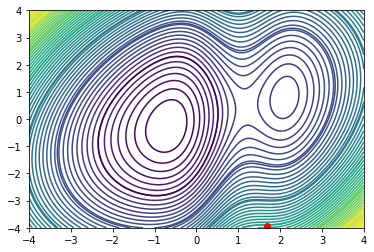

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-(x[0]-1)**2)

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()



In the given range -4<=x,y<=4, there exist two minima in the function. If we use the optmization techniques which we learned from the previous class, we will find our results will fall into two categories. Yes, the results depends on the initial value. The entire space has been splited into two basins. If the initial value is in basin 1, the

Here is the link to the available methods in [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [2]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.387859
         Iterations: 49
         Function evaluations: 92


In [3]:
#please input more methods in this block ()
[x0, y0] = init(x_min, x_max, y_min, y_max)


The problem will become more frequent if we are dealing with a function with multiple variables. 
We will alway get stuck in a local minima.
It turns out the previous optimization techniques do not give us the reliable solution. What shall we do?


## 17.2 Brute force methods

Since the gradient based methods is no longer reliable for the case of multiple minima. We shall return to the more
strightforward method.

From the first look, one might immediately come up with two simple ideas:

- _Grid based search_, set a very fine resolution in x-y space, and then evalute the function on each grid
 
- _Random sampling_, simply generate a lot of (x,y) points, and take the minimum values from all attempts


In [74]:
# Grid search
def grid_search(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
        
    #---to complete-----#

    #---to complete-----#
            
    return minf
                

In [75]:
# Random search
def random_search(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
    #---to complete-----#

    #---to complete-----#            
    return minf



In [39]:
# Execute your code here

## 17.3 Mixed stratergy
From the above run, one might find that a more effective way as follow,

- 1, randomly select a point
- 2, perform a local optimization on each point

This methods would simply take the advantages of both sides, will outperform than all previous methods.
In fact, this idea has been largely used nowadays in many fields.


In [ ]:
# Mixed Random search

def random_search2(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
    #---to complete-----#

    #---to complete-----#            
    return minf



## 17.4 Interatomic interaction

When two atoms get close to each other, they will feel interaction from each other. The true interatomic interactions are quantum mechanical in nature, and there is no known way in which the true interactions described by the Schrödinger equation or Dirac equation for all electrons and nuclei could be cast into an analytical functional form. However, we can approximate the interaction with all analytical interatomic potentials.

The arguably simplest widely used interatomic interaction model is the Lennard-Jones potential,

$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

where $\epsilon$ is the depth of the potential well and $\sigma$ is the distance at which the potential crosses zero, while $r$ is the distance between two atoms.

The term proportional to $1/r^6$ in the potential can be motivated from a classical or quantum mechanical description of the interaction between induced electric dipoles.[6] This potential seems to be quite accurate for noble gases, and is widely used for systems where dipole interactions are significant, including in chemistry force fields to describe intermermolecular interactions.

Suppose $\epsilon$ = $\sigma$ = 1, what will be the configuration of two atoms resulting the lowest V?

The problem appears to be a 6-dimensions problem, since there are two atoms, and each atom has three variables (x,y,z). However, we can immediately reduce it to 3 dimension, because we only cares about the configuration.
And the configuration is _translational invariant_. Hence we fix the position for the first atom. Furthermore,
we will also discover that the configuration is _rotational invariant_, so we only care about the distance between
two atoms. 


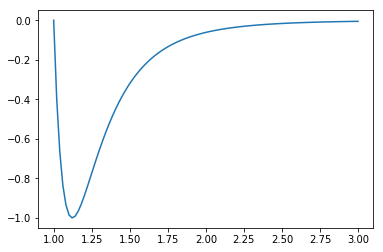

minimum value:    -0.999955009867


In [73]:
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.plot(r, LJ(r))
plt.show()

print('minimum value:   ', min(LJ(r)))

## 17.5 Homework

Write a program to find the ground state of LJ potential for N=3 (assuming $\epsilon$ = $\sigma$ = 1)

[Refenece](http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html)
